# **Import Libraries**

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv


In [64]:
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
sns.set_theme(color_codes=True, style='darkgrid', 
              palette='deep', font='sans-serif')

# **Load Data Train**

In [65]:
# Load data
trainData = pd.read_csv('../input/loan-prediction-based-on-customer-behavior/Training Data.csv')

# **Check and Clean Data Train**

In [66]:
# Getting the first 5 rows of data
trainData.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [67]:
# Getting the last 5 rows of data
trainData.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [68]:
# Checking the shape of data
trainData.shape

(252000, 13)

In [69]:
# Checking the null value
trainData.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [70]:
# Getting the information 
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [71]:
# Checking the target
trainData.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

# **Encode**

we need to encode the data since the data have a categorical data, and i'm using LabelEncoder here.

In [72]:
labelEncoder = LabelEncoder()

In [73]:
# Accommodate data into dataVariables
data = trainData

# Encode the object data to type int
for e in data.columns:
    if data[e].dtype == 'object':
        labelEncoder.fit(list(data[e].values))
        data[e] = labelEncoder.transform(data[e].values)
        
        # Accommodate the data that has been changed
        trainData = data

In [74]:
# Checking the first 5 rows of data
trainData.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


In [75]:
# Getting the information
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Id                 252000 non-null  int64
 1   Income             252000 non-null  int64
 2   Age                252000 non-null  int64
 3   Experience         252000 non-null  int64
 4   Married/Single     252000 non-null  int64
 5   House_Ownership    252000 non-null  int64
 6   Car_Ownership      252000 non-null  int64
 7   Profession         252000 non-null  int64
 8   CITY               252000 non-null  int64
 9   STATE              252000 non-null  int64
 10  CURRENT_JOB_YRS    252000 non-null  int64
 11  CURRENT_HOUSE_YRS  252000 non-null  int64
 12  Risk_Flag          252000 non-null  int64
dtypes: int64(13)
memory usage: 25.0 MB


# **EDA**

In [76]:
# Getting the statistical info
trainData.describe()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


In [77]:
# Make a correlation data to knowing Value Strength and Direction of Linear Relationship
corr = trainData.corr()
corr

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,0.001134,-0.002583,-0.004313,-0.005734,-0.000972,0.002012,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.002682,0.016433,0.004068,0.000725,-0.001919,-0.004067,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,-0.005323,-0.009820,0.009395,-0.008551,0.002104,-0.004985,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,-0.001752,-0.007912,0.007519,0.000975,-0.025703,-0.001251,0.646098,0.019309,-0.034523
Married/Single,0.001134,0.002682,-0.005323,-0.001752,1.000000,-0.022501,0.001206,-0.007534,0.012280,-0.009477,0.004251,-0.007539,0.021092
House_Ownership,-0.002583,0.016433,-0.009820,-0.007912,-0.022501,1.000000,-0.001233,0.001242,-0.014447,-0.007792,-0.009790,-0.005618,0.023622
Car_Ownership,-0.004313,0.004068,0.009395,0.007519,0.001206,-0.001233,1.000000,0.011887,0.001648,0.026000,0.011099,0.000251,-0.024036
Profession,-0.005734,0.000725,-0.008551,0.000975,-0.007534,0.001242,0.011887,1.000000,0.018852,0.001557,-0.004536,0.001954,-0.004900
CITY,-0.000972,-0.001919,0.002104,-0.025703,0.012280,-0.014447,0.001648,0.018852,1.000000,-0.038040,-0.027353,-0.010654,0.004575
STATE,0.002012,-0.004067,-0.004985,-0.001251,-0.009477,-0.007792,0.026000,0.001557,-0.038040,1.000000,0.008745,0.007281,-0.003401


[]

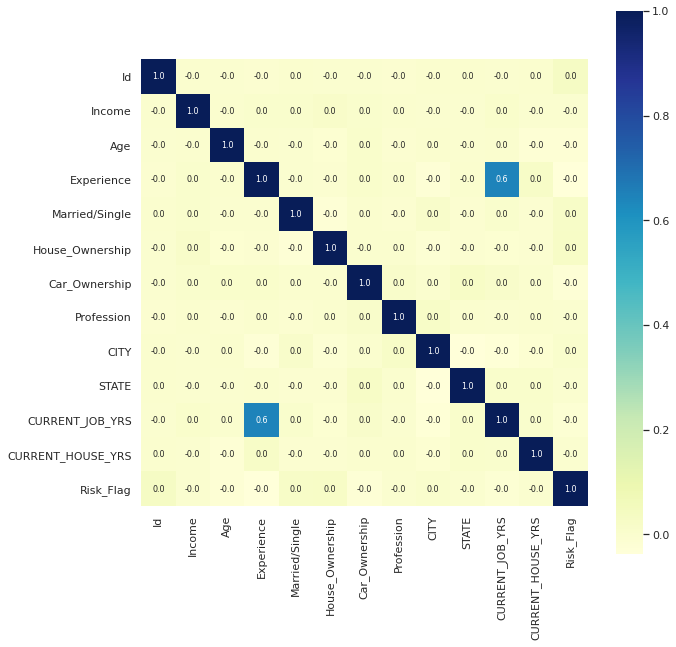

In [78]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='YlGnBu')
plt.plot()

In [79]:
corr["Risk_Flag"].sort_values(ascending=False)

Risk_Flag            1.000000
Id                   0.032153
House_Ownership      0.023622
Married/Single       0.021092
CITY                 0.004575
Income              -0.003091
STATE               -0.003401
CURRENT_HOUSE_YRS   -0.004375
Profession          -0.004900
CURRENT_JOB_YRS     -0.016942
Age                 -0.021809
Car_Ownership       -0.024036
Experience          -0.034523
Name: Risk_Flag, dtype: float64

Id - City Ownership have a better correlation.

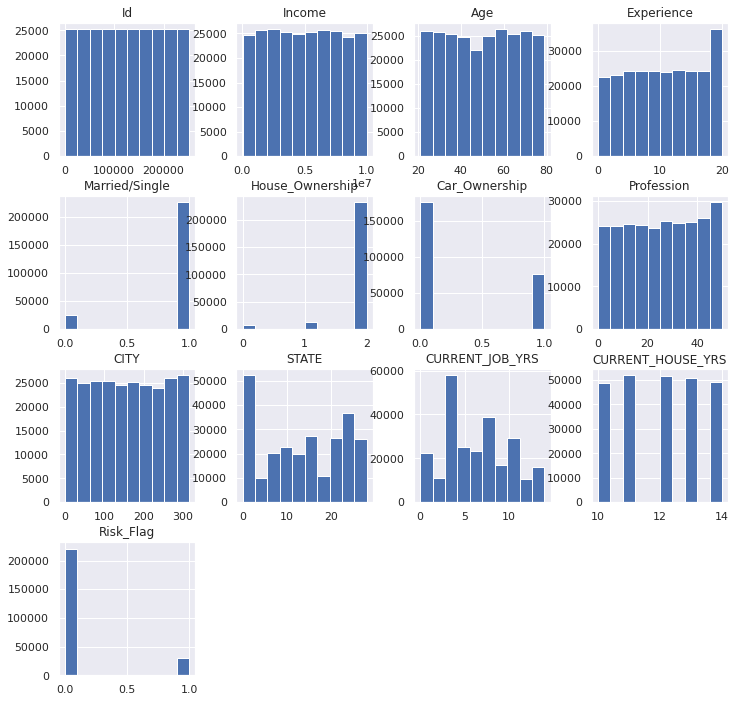

In [80]:
# Create a histogram
trainData.hist(figsize=(12, 12))
plt.show()

In [81]:
# Checking the structure of the data
trainData.sample(11, random_state=1).T

,242744,177358,22218,13974,193370,34661,121887,186187,189643,11026,156538
Id,242745,177359,22219,13975,193371,34662,121888,186188,189644,11027,156539
Income,7765404,4161972,7767858,2135764,3990809,7353596,1999332,5752584,1303925,9344382,6506739
Age,55,41,29,35,58,66,56,30,57,38,50
Experience,8,16,0,19,12,5,1,5,11,14,4
Married/Single,1,1,0,1,1,1,1,1,1,1,1
House_Ownership,0,1,2,2,1,2,2,2,2,2,2
Car_Ownership,0,0,0,0,0,0,0,0,0,1,0
Profession,30,10,37,25,33,4,27,39,42,42,39
CITY,161,113,316,103,189,206,64,58,151,155,3
STATE,14,2,7,28,6,28,25,2,2,13,6


**Coefficient of Variation**

The coefficient of variation is a measure of variance that can be used to compare a data distribution that has different units.

* **The higher the Coefficient of Variation** = the wider the data you have compared to the average data (more difficult to predict).
* **The Lower Coefficient of Variation** = The narrower the data you have compared to the Average data (Easier to predict).

In [82]:
# Coefficient of Risk Flag
covRiskFlag = ((trainData['Risk_Flag'].std()/trainData['Risk_Flag'].mean()) * 100)
print(f'Coefficient Of Variation Potability : {covRiskFlag}%')

Coefficient Of Variation Potability : 267.02265062872186%


as you can see the output above, the **coefficient of variation is so high**, which mean, is so **difficult to predict**.

# **Divide and Split Data**

In [83]:
dataX = trainData.drop(['Risk_Flag'], axis=1)
dataY = trainData['Risk_Flag']

In [84]:
trainX, testX, trainY, testY = train_test_split(dataX, dataY, 
                                                test_size=.2,
                                                random_state=12)

In [85]:
# Checking the value of train X
trainX.value_counts()

Id      Income   Age  Experience  Married/Single  House_Ownership  Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS
2       7574516  40   10          1               2                0              43          227   14     9                13                   1
168033  1868963  73   16          1               2                1              13          157   25     7                12                   1
168037  4388557  43   8           1               2                0              26          44    20     7                13                   1
168038  229554   74   15          1               2                0              50          246   10     14               11                   1
168039  191830   45   9           1               2                0              20          29    28     9                12                   1
                                                                                                                           

In [86]:
# Checking the value of test X
testX.value_counts()

Id      Income   Age  Experience  Married/Single  House_Ownership  Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS
1       1303834  23   3           1               2                0              33          251   13     3                13                   1
167798  4070923  23   6           1               2                1              20          9     25     6                11                   1
167805  5714975  41   10          1               2                1              36          85    14     10               14                   1
167810  976533   48   2           1               2                0              44          33    28     2                10                   1
167814  1578598  50   11          1               2                0              43          186   25     11               11                   1
                                                                                                                           

In [87]:
# Checking the value of train Y
trainY.value_counts()

0    176881
1     24719
Name: Risk_Flag, dtype: int64

In [88]:
# Checking the value of test Y
testY.value_counts()

0    44123
1     6277
Name: Risk_Flag, dtype: int64

# **Upsampling Data**

upsampling the target using **SMOTE**, because we can see the risk flag data **have a huge difference**.

In [89]:
sm = SMOTE(random_state=12)
trainXres, trainYres = sm.fit_resample(trainX, trainY)

# **Train and Predict**

In [90]:
# Our model
model = RandomForestClassifier(n_estimators=500, 
                               random_state=12, 
                               min_samples_leaf=2, 
                               criterion='entropy')

In [91]:
# Fit model
model.fit(trainXres, trainYres)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       n_estimators=500, random_state=12)

In [92]:
# Predict 
predY = model.predict(testX)

In [93]:
# Print roc_auc_score
print(roc_auc_score(testY, predY))

0.7719196389143039
